In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [111]:
multimodal_df = pd.read_json("./lab6/search_results_multimodal_9.jsonl", lines=True)
rings3_df = pd.read_json("./lab6/search_results_rings3_9.jsonl", lines=True)
rings5_df = pd.read_json("./lab6/search_results_rings5_9.jsonl", lines=True)
xor3_df = pd.read_json("./lab6/search_results_xor3_9.jsonl", lines=True)

In [89]:
df = xor3_df[["activation", "fscore"]]
df["fscore"].isna().sum()

0

In [112]:
multimodal_df = multimodal_df.dropna(subset=["mse"])
multimodal_df["activation"] = multimodal_df["activation"].apply(tuple).astype("category")

In [116]:
best_run = multimodal_df[multimodal_df["mse"] == multimodal_df["mse"].min()]
runs = best_run[["activation", "batch_size", "learning_rate"]].merge(multimodal_df)

0.0


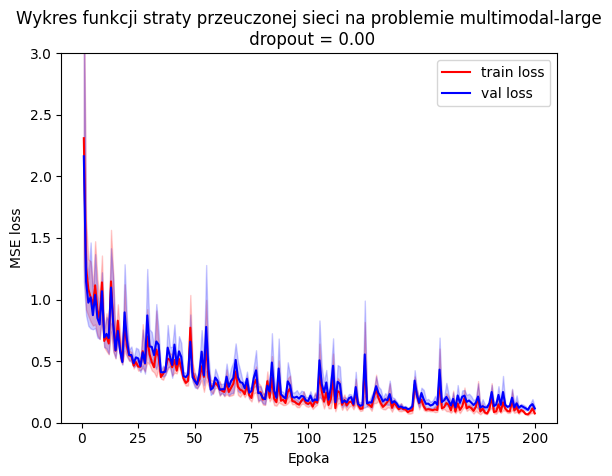

0.15


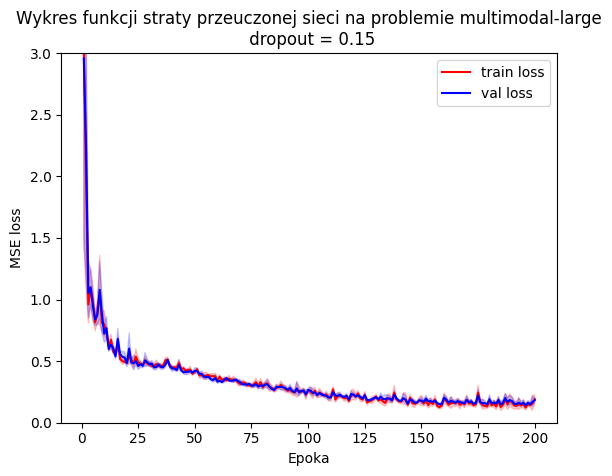

0.30000000000000004


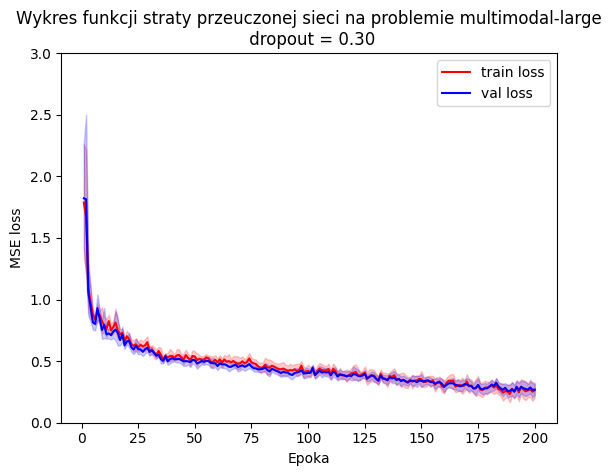

0.45


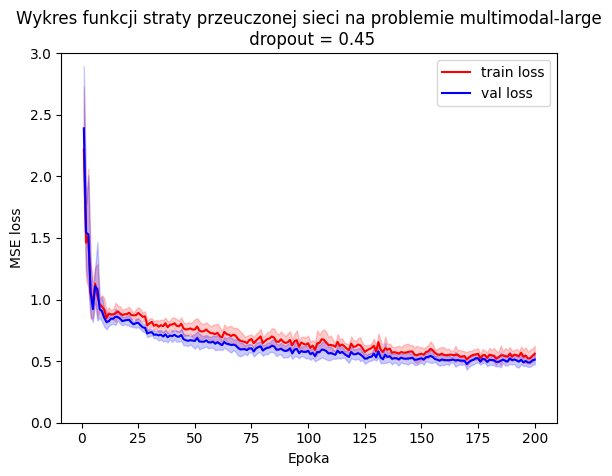

In [119]:
colors = ["red", "blue", "green", "orange", "purple"]
runs2 = runs[["dropout", "loss", "val_loss"]]
for dropout, df in runs2.groupby("dropout"):
    print(dropout)
    df2 = df["loss"].reset_index(drop=False).explode("loss")
    df2['epoch'] = df2.groupby("index").cumcount()+1
    sns.lineplot(data=df2, x="epoch", y="loss", color=colors[0], label=f"train loss")
    df2 = df["val_loss"].reset_index(drop=False).explode("val_loss")
    df2['epoch'] = df2.groupby("index").cumcount()+1
    sns.lineplot(data=df2, x="epoch", y="val_loss", color=colors[1], label=f"val loss")
    plt.xlabel("Epoka")
    plt.ylim(0, 3)
    plt.ylabel("MSE loss")
    plt.title(f"Wykres funkcji straty przeuczonej sieci na problemie multimodal-large\n dropout = {dropout:.2f}")
    plt.show()


# for i, (idx, df) in enumerate(.groupby("dropout")):
# plt.title("Wykres znormalizowanego MSE na zbiorze treningowym\npodczas uczenia dla najlepszych architektur")
# plt.xlabel("Epoka")
# plt.ylabel("Normalized MSE")
# plt.show()

0.0


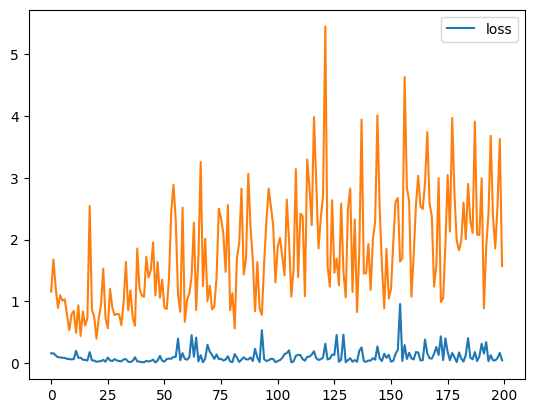

In [51]:
print(xor3_df.loc[2, "dropout"])
plt.plot(xor3_df.loc[2, "loss"], label="loss")
plt.plot(xor3_df.loc[2, "val_loss"])
plt.legend()

<Axes: title={'center': 'fscore'}, xlabel='dropout'>

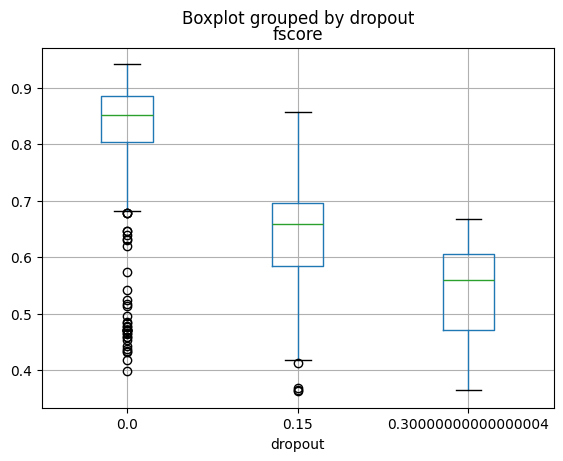

In [15]:
xor3_df[~xor3_df["fscore"].isna()][["dropout", "fscore"]].boxplot(column="fscore", by="dropout")

<Axes: title={'center': 'mse'}, xlabel='dropout'>

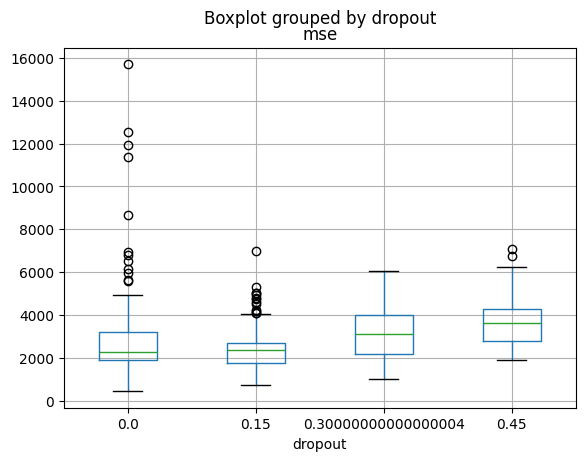

In [44]:
multimodal_df.boxplot(column="mse", by="dropout")

In [55]:
multimodal_df[["dropout", "mse"]].groupby("dropout").min().set_index("mse").join(
    multimodal_df.set_index("mse")
)

,activation,batch_size,dropout,learning_rate,loss,val_loss
mse,,,,,,
428.130932,"[relu, he]",20,0.00,0.005,"[0.8337825314, 0.9452523462, 0.8469105084, 0.8...","[0.8566716599, 1.0617911403, 0.7041675818, 0.6..."
746.442362,"[relu, he]",20,0.15,0.005,"[0.7952840433, 0.7134547353, 0.7572876173, 0.8...","[0.6893172386, 0.6290558572, 0.8834964352, 0.7..."
746.442362,"[relu, he]",20,0.15,0.005,"[0.7952840433, 0.7134547353, 0.7572876173, 0.8...","[0.6893172386, 0.6290558572, 0.8834964352, 0.7..."
989.124593,"[relu, he]",20,0.30,0.005,"[3.1621371339, 1.5290285847, 1.551979595000000...","[2.6935254633, 1.2637801082, 1.2804509866, 0.8..."
1884.724042,"[tanh, xavier]",20,0.45,0.010,"[1.6186504261999999, 1.7508232893, 1.364660749...","[1.3699623091, 1.6166778475, 1.2287377607, 1.2..."


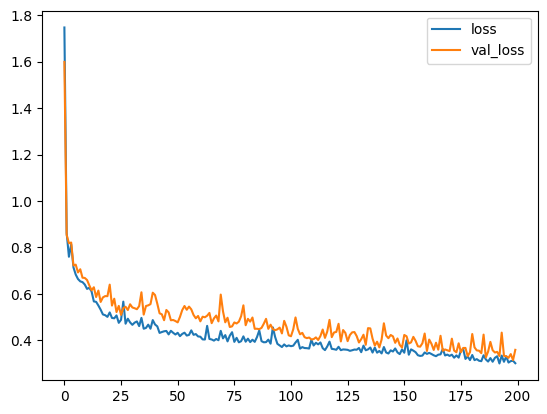

In [28]:
plt.plot(multimodal_df.loc[3, "loss"], label="loss")
plt.plot(multimodal_df.loc[3, "val_loss"], label="val_loss")
plt.legend()

<Axes: title={'center': 'fscore'}, xlabel='dropout'>

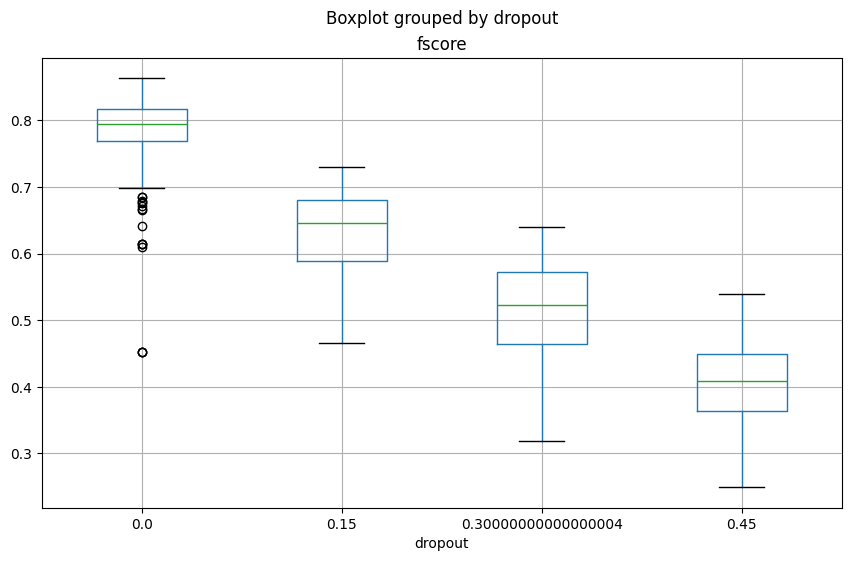

In [33]:
rings5_df.boxplot(column="fscore", by="dropout", figsize=(10, 6))

In [32]:
rings5_df.sort_values(by="fscore", ascending=False).head(10)

,activation,batch_size,dropout,learning_rate,fscore,loss,val_fscore,val_loss
370,"[tanh, xavier]",50,0.0,0.005,0.863110,"[1.3659911923, 1.3259045038, 1.3121606605, 1.2...","[None, None, None, None, None, 0.2760166343, 0...","[1.4478824302, 1.3944559319, 1.393547949, 1.34..."
975,"[tanh, xavier]",20,0.0,0.005,0.859333,"[1.3379733993, 1.3337753052, 1.2373353053, 1.1...","[None, None, 0.3198993536, None, 0.36281363980...","[1.4099480691, 1.4373088269, 1.299754447, 1.22..."
654,"[relu, he]",20,0.0,0.001,0.858782,"[1.4504380182, 1.2943361779, 1.2308928088, 1.1...","[0.2510153685, None, None, 0.383087971, 0.3776...","[1.5874259441, 1.3809265774, 1.2727879304, 1.2..."
1039,"[relu, he]",20,0.0,0.001,0.858782,"[1.4504380182, 1.2943361779, 1.2308928088, 1.1...","[0.2510153685, None, None, 0.383087971, 0.3776...","[1.5874259441, 1.3809265774, 1.2727879304, 1.2..."
273,"[relu, he]",20,0.0,0.001,0.858782,"[1.4504380182, 1.2943361779, 1.2308928088, 1.1...","[0.2510153685, None, None, 0.383087971, 0.3776...","[1.5874259441, 1.3809265774, 1.2727879304, 1.2..."
786,"[relu, he]",20,0.0,0.001,0.858782,"[1.4504380182, 1.2943361779, 1.2308928088, 1.1...","[0.2510153685, None, None, 0.383087971, 0.3776...","[1.5874259441, 1.3809265774, 1.2727879304, 1.2..."
1170,"[relu, he]",20,0.0,0.001,0.858782,"[1.4504380182, 1.2943361779, 1.2308928088, 1.1...","[0.2510153685, None, None, 0.383087971, 0.3776...","[1.5874259441, 1.3809265774, 1.2727879304, 1.2..."
144,"[relu, he]",20,0.0,0.001,0.858782,"[1.4504380182, 1.2943361779, 1.2308928088, 1.1...","[0.2510153685, None, None, 0.383087971, 0.3776...","[1.5874259441, 1.3809265774, 1.2727879304, 1.2..."
402,"[relu, he]",20,0.0,0.001,0.858782,"[1.4504380182, 1.2943361779, 1.2308928088, 1.1...","[0.2510153685, None, None, 0.383087971, 0.3776...","[1.5874259441, 1.3809265774, 1.2727879304, 1.2..."
704,"[tanh, xavier]",10,0.0,0.001,0.857473,"[1.4233307708, 1.3679965422, 1.352472864200000...","[None, None, None, None, None, None, None, Non...","[1.4767427426, 1.4405437592, 1.422711684, 1.39..."


In [47]:
df = multimodal_df.copy()
df["last_train_loss"] = multimodal_df["loss"].apply(lambda x: x[-1])
df["last_val_loss"] = multimodal_df["val_loss"].apply(lambda x: x[-1])
df2 = df[["dropout", "last_train_loss", "last_val_loss"]]

<Axes: xlabel='dropout'>

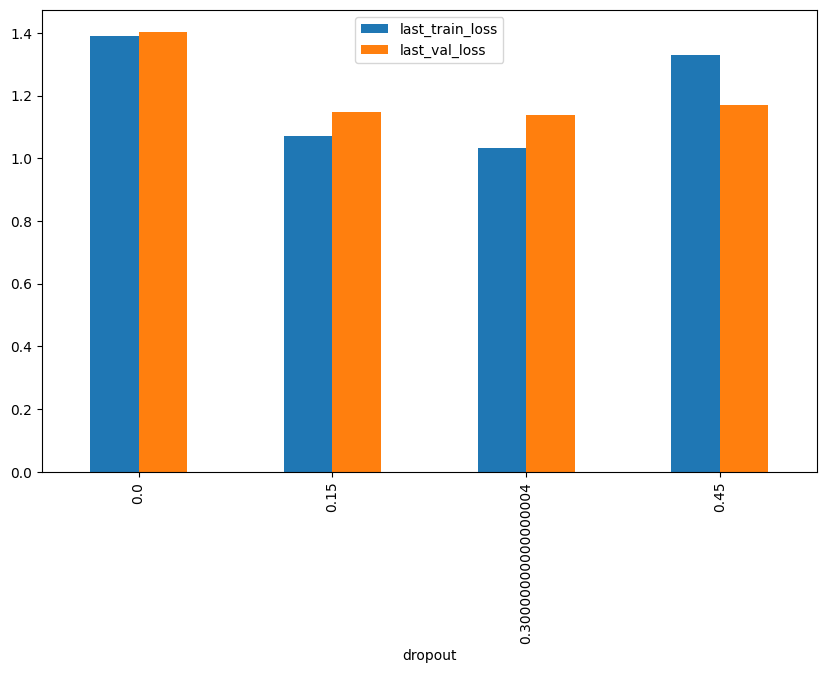

In [49]:
df2.groupby("dropout").max().plot(kind="bar", figsize=(10, 6))

<Axes: title={'center': 'last_val_loss'}, xlabel='dropout'>

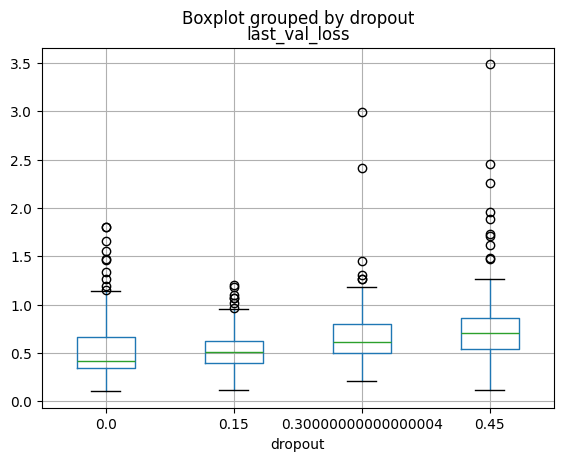

In [30]:
df2.boxplot(column="last_val_loss", by="dropout")